# Nicole Hamler 
### "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

# Geospatial Analysis using GeoPandas - Part 1

## 1. GeoPandas Basics:
* GeoPandas is an extension to Pandas that allows for spatial operations and analytics using the shapely library. 
* GeoPandas should be used for exploratory data analysis when using Jupyter notebooks and when working with discrete spatial data types.
* Six classes of geometric objects: 
 - Single entity:
    * Point
    * Line
    * Polygon
 - Homogeneous entity collections:
    * Multi-Point
    * Multi-Line (MultiLineString)
    * Multi-Polygon
* Corresponding with Pandas' Series, GeoPandas has a GeoSeries which is the building block for the GeoDataFrame
    * GeoSeries made up of an index and geometry type which is a shapely geometry object (e.g. object.area, object.bounds, etc.) 

## Two types of geo data
### Raster data vs. vector data:
* Raster data is based on satellite imagery 
  - Pixel based
  - GDAL uses raster data
* Vector data is based on coordinates and their relationships
  - Geometric object based (i.e. point, line, etc.)
  - GEOS uses vector data
* GeoPandas libraries generally work with vector data and use the beforementioned geometric object classes also referred to as OGC Simple Features. Each vector feature will have attributes attached to it that describes that feature.

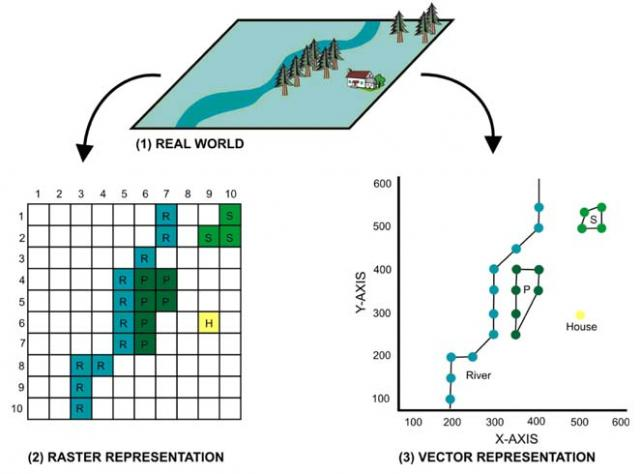

In [1]:
from IPython.display import Image
Image(filename="data\\raster_vector.jpg") 

* Image obtained from: https://gis.stackexchange.com/questions/7077/what-are-raster-and-vector-data-in-gis-and-when-to-use

## Libraries generally used with GeoPandas:
* Matplotlib
* Fiona 
    * Interface to GDAL/OGR 
    * Allows GeoPandas to read and write many different GIS file formats
* Shapely 
    * Interface to GEOS
* Seaborn
* Descartes
* Pyproj - pythonic interface to PROJ.4

In [2]:
%matplotlib inline

from __future__ import (absolute_import, division, print_function)
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
plt.style.use('bmh')

import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
from geopandas.tools import sjoin

## 2. Shapely and GeoPandas 
### The Shapely library allows manipulation and analysis of geometric objects:

In [3]:
# Import of geometric objects for their creation and visual presentation
from shapely.geometry import Point, LineString, Polygon

In [4]:
# Creating geometric objects with values
point = Point(1,1)
line = LineString([(0,0),(5,9),(10,8)])
poly = line.buffer(1)

In [5]:
# Does the polygon contain the point?
poly.contains(point)

True

### GeoSeries and Geometric Objects
#### A GeoSeries from a list of the shapely point objects can be created using the point constructor:
* A GeoSeries is a series that holds the geometry objects

In [6]:
# Assigning points to a GeoSeries:
gs = GeoSeries([Point(-10, 15), Point(-5, 16), Point(10, 2)])
gs

0    POINT (-10 15)
1     POINT (-5 16)
2      POINT (10 2)
dtype: object

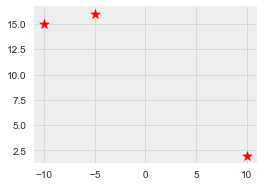

In [7]:
# Points can now be plotted on a chart:
gs.plot(marker='*', color='red', markersize=100, figsize=(4, 4))

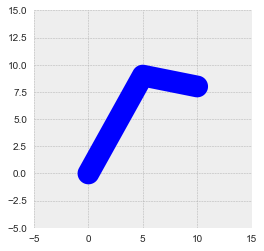

In [8]:
# One can also assign a polygon to the GeoSeries:
gs1 = GeoSeries(poly)
gs1.plot(color = 'blue', markersize = 100, figsize = (4,4))
plt.xlim([-5, 15])
plt.ylim([-5, 15]);

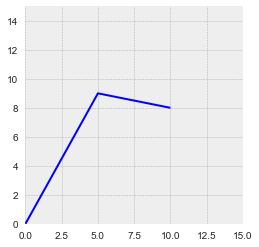

In [9]:
# Assigning the line to the GeoSeries:
gs2 = GeoSeries(line)
gs2.plot(color = 'blue', markersize = 100, figsize = (4,4))
plt.xlim([0, 15])
plt.ylim([0, 15]);

## 3. Datasets included in GeoPandas
### Naturalearth dataset can be referenced in GeoPandas
* Source of dataset: http://www.naturalearthdata.com/ - additional datasets are available on the website

In [10]:
# Getting the GeoDataFrame and assigning to variable:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(2)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...


* The GeoDataFrame is comparable to the Pandas DataFrame, however, it includes a 'geometry' column. This geometric attribute returns a GeoSeries (series that holds the geometric objects). 

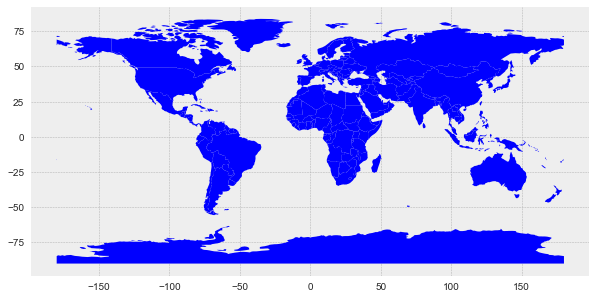

In [11]:
# Plot of NaturalEarth Dataset:
world.plot(figsize=(10,20))

### GeoPandas allows us to show the GDP per capita of the countries by referencing the specific column:

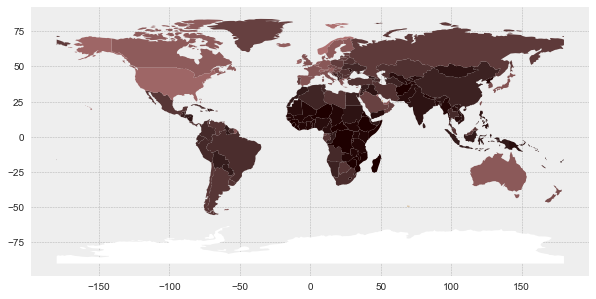

In [12]:
# Plot by GDP per capita:
world = world[(world.pop_est>0)]

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap', cmap = 'pink', figsize = (10,20));

## 4. Shapefiles 
### Shapefiles are datasets that store geometric and location attributes of geographic features (e.g. coordinates).
   * Map of Germany obtained through dataset downloaded from: http://www.diva-gis.org/gdata 
   * GeoPandas has function gpd.read comparable to Pandas which allows program to read in shape files for further spatial analysis

## a) Simple Shapefile containing one geometric object 

In [13]:
germany = gpd.read_file("data\DEU_adm0.shp")
germany

,ID_0,ISO,NAME_0,OBJECTID_1,ISO3,NAME_ENGLI,NAME_ISO,NAME_FAO,NAME_LOCAL,NAME_OBSOL,...,CARICOM,EU,CAN,ACP,Landlocked,AOSIS,SIDS,Islands,LDC,geometry
0,86,DEU,Germany,62,DEU,Germany,GERMANY,Germany,Deutschland,,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(POLYGON ((8.70837306976324 47.71555709838862,..."


#### Data types of contained data in the geometry column can be obtained using ".geom_type"

In [14]:
germany.geom_type.head(2)

0    MultiPolygon
dtype: object

* This file contains one multipolygon as a geometric object. 

#### Object can then be plotted by using the .plot extension:

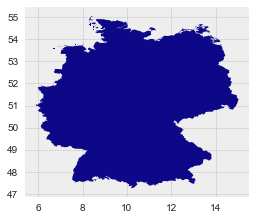

In [15]:
germany.plot(cmap='plasma', figsize=(4,6));

## b) Shapefile containing multiple geometric objects
### Let's import a file that depicts the different districts in Germany:
* The GeoDataFrame shows muliple rows and columns with the geometry column being the last. 

In [16]:
districts = gpd.read_file("data\DEU_adm2.shp")
districts.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,86,DEU,Germany,1,Baden-Württemberg,1,Freiburg,Regierungsbezirk,Administrative Region,,Friburgo|Fribourg,"(POLYGON ((8.70837306976324 47.71555709838862,..."
1,86,DEU,Germany,1,Baden-Württemberg,2,Karlsruhe,Regierungsbezirk,Administrative Region,,,"POLYGON ((9.457980155944824 49.64889144897461,..."
2,86,DEU,Germany,1,Baden-Württemberg,3,Stuttgart,Regierungsbezirk,Administrative Region,,Estugarda,"POLYGON ((9.650460243225155 49.7763404846192, ..."
3,86,DEU,Germany,1,Baden-Württemberg,4,Tübingen,Regierungsbezirk,Administrative Region,,Tubinga,"POLYGON ((9.951169013977165 48.63167953491211,..."
4,86,DEU,Germany,2,Bayern,5,Mittelfranken,Regierungsbezirk,Administrative Region,,Franconia Central|Middle Franconia|Média Franc...,"POLYGON ((10.74197006225597 49.77238845825207,..."


In [17]:
# Accessing the geometry column only is similar to how it is done in Pandas:
districts.geometry.head()

0    (POLYGON ((8.70837306976324 47.71555709838862,...
1    POLYGON ((9.457980155944824 49.64889144897461,...
2    POLYGON ((9.650460243225155 49.7763404846192, ...
3    POLYGON ((9.951169013977165 48.63167953491211,...
4    POLYGON ((10.74197006225597 49.77238845825207,...
Name: geometry, dtype: object

### Type of the shapefile and data types contained in the file:

In [18]:
# Type of file: 
type(districts)

geopandas.geodataframe.GeoDataFrame

* Type of the districts file is a GeoDataFrame - essentially this is a Pandas dataframe with a geometry column.

In [19]:
# Data type of geometry column:
type(districts.geometry)

geopandas.geoseries.GeoSeries

* Data Type contained in the geometry column are GeoSeries.

In [20]:
# Accessing a specific value's data type within the GeoSeries:
type(districts.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

* Data Type contained in the GeoSeries are Polygons

### Geometric analysis 

#### Calculating the area of districts in the file:

In [21]:
# To get the area of the different districts:
districts.geometry.area.head()

0    1.119821
1    0.852975
2    1.298480
3    1.079738
4    0.893166
dtype: float64

#### Creating / Obtaining a separate point to analyze various aspects in relation to the districts file:

In [22]:
# Assigning coordinates of point of the geographic location for Rothenburg ob der Tauber (coordinates obtained from Google)
# Variable_Name = Point(location.longitude, location.latitude)
RBG = Point(10.1867, 49.33802)
districts.contains(RBG).head()

0    False
1    False
2    False
3    False
4     True
dtype: bool

* Returns a large number of rows and the details of the district are not depicted in this output.

#### Showing only the specific district (polygon) which contains the point in the output:

In [23]:
# Obtaining specific information on the geometry object by using .contains(Point)
districts[districts.contains(RBG)]

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
4,86,DEU,Germany,2,Bayern,5,Mittelfranken,Regierungsbezirk,Administrative Region,,Franconia Central|Middle Franconia|Média Franc...,"POLYGON ((10.74197006225597 49.77238845825207,..."


* District which contains Rothenburg ob der Tauber (RBG) is Middle Franconia ("Mittelfranken") in the state of Bavaria ("Bayern"). 

#### Distance from each district to our point:

In [24]:
# Obtain distance from each district to point by using .geometry.distance(var)
districts.geometry.distance(RBG).head()

0    1.737935
1    0.577611
2    0.037461
3    0.739213
4    0.000000
dtype: float64

### Plotting the shapefile 
* Colorscheme can be customized by changing cmap attribute

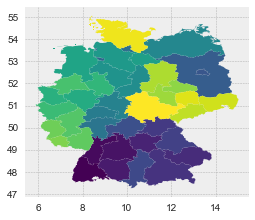

In [25]:
districts.plot(cmap='viridis', figsize=(4,6))

## 5. Working with multiple data sets 
### Import of two additional files to show population centers and roads in Germany
* Files were obtained from the NaturalEarth Webpage: http://www.naturalearthdata.com/ 

In [26]:
# Naturalearth dataset provides us with global data which we will have to restrict to the coordinates for Germany 
pop = gpd.read_file("data\\ne_10m_populated_places.shp")
pop.head(2)

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,...,wof_id,CAPALT,NAME_EN,NAME_DE,NAME_ES,NAME_FR,NAME_PT,NAME_RU,NAME_ZH,geometry
0,10,1,8,Admin-1 capital,Colonia del Sacramento,,,0,Colonia del Sacramento,0.0,...,421199749,0,Colonia del Sacramento,Colonia del Sacramento,Colonia del Sacramento,Colonia del Sacramento,Colônia do Sacramento,Колония-дель-Сакраменто,科洛尼亞德爾薩克拉門托,POINT (-57.84000247340134 -34.47999900541754)
1,10,1,8,Admin-1 capital,Trinidad,,,0,Trinidad,0.0,...,890444639,0,Trinidad,Trinidad,Trinidad,Trinidad,Trinidad,Тринидад,特立尼達,POINT (-56.90099656015872 -33.5439989373607)


### Importing road map data from natural earth database

In [27]:
# As with the population dataset, the road map data provides us with global data
rd = gpd.read_file("data\\ne_10m_roads.shp")
rd.head(1)

,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,...,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label,geometry
0,8,Road,Secondary Highway,CAN,,"Version 1.5: Changed alignment, a few adds in ...",,,,,...,0,0,,314705,North America,0,,7.1,9.6,LINESTRING (-133.3253277398332 62.215709333037...


In [28]:
# Grouping by the different continents included in the file:
rd.groupby('continent').count()

,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,...,add,rwdb_rd_id,orig_fid,prefix,uident,expressway,level,min_zoom,min_label,geometry
continent,,,,,,,,,,,,,,,,,,,,,
Africa,6761,6761,6761,6761,6761,6761,6761,6761,6761,6761,...,6761,6761,6761,6761,6761,6761,6761,6761,6761,6761
Asia,25505,25505,25505,25505,25505,25505,25505,25505,25505,25505,...,25505,25505,25505,25505,25505,25505,25505,25505,25505,25505
Europe,9849,9849,9849,9849,9849,9849,9849,9849,9849,9849,...,9849,9849,9849,9849,9849,9849,9849,9849,9849,9849
North America,9238,9238,9238,9238,9238,9238,9238,9238,9238,9238,...,9238,9238,9238,9238,9238,9238,9238,9238,9238,9238
North America x-fade,188,188,188,188,188,188,188,188,188,188,...,188,188,188,188,188,188,188,188,188,188
Oceania,856,856,856,856,856,856,856,856,856,856,...,856,856,856,856,856,856,856,856,856,856
South America,4204,4204,4204,4204,4204,4204,4204,4204,4204,4204,...,4204,4204,4204,4204,4204,4204,4204,4204,4204,4204


In [29]:
# Extracting only European roadways as would be done in Pandas:
EU = rd.loc[rd['continent'] == "Europe"]
EU.head(2)

,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,...,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label,geometry
4186,4,Road,Major Highway,,,New in version 2.0.0,,,,_untitled_262,...,0,0,,0,Europe,1,,4.0,7.0,LINESTRING (23.84246506528342 42.9061918097508...
4187,3,Road,Major Highway,,,New in version 2.0.0,31,,,E31 A61,...,0,0,E,0,Europe,1,E,3.0,6.0,LINESTRING (8.314632456881025 49.5508332150352...


## 6.) Multiple layers
### a) Joining two datasets: 

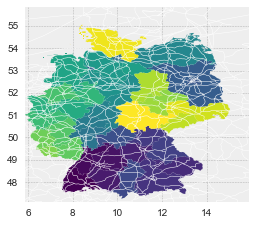

In [30]:
ax = EU.plot(linewidth = 0.5, color = 'w', figsize = (4,6))
districts.plot(ax=ax, cmap = "viridis", markersize = 5)
ax.set(xlim=(5.883,15.88), ylim=(47.12, 55.84));

* The code used above will adjust the plot to the figuresize, however, if ax.set_axis_off() is used, the size will remain true to the original file's sizing.

###  b) Joining three datasets together on one plot:

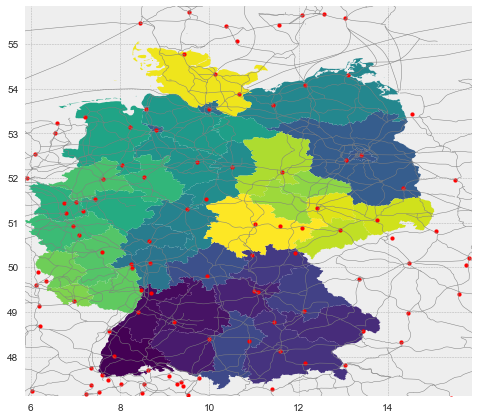

In [31]:
ax = EU.plot(linewidth = 0.5, color = 'grey', figsize = (8,10))
districts.plot(ax=ax, cmap = "viridis", markersize = 5)
pop.plot(ax=ax, linewidth = 0.25, color = 'r', markersize = 15, figsize = (8,10))
ax.set(xlim=(5.883,15.88), ylim=(47.12, 55.84));

- The map above shows us all three plots layered in one image, but due to color scheme it is difficult to make out different districts, population centers, etc. 

#### Use of different color schemes can be helpful in differentiating between the data points. 
- Since we have used global data, it is not very detailed on a national level (i.e. the road map data). 
- To use different color schemes for an attribute use of column = 'COLUMN_NAME' in the applicable dataset can be used. 

### Classification of population centers

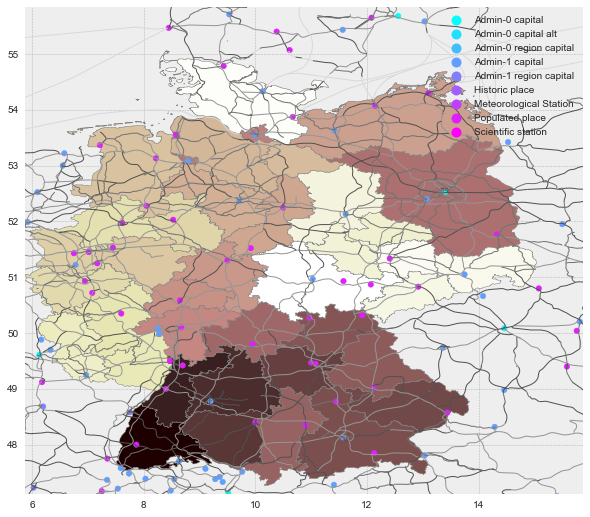

In [32]:
# Instead of using param of 'color=' we will use 'column=COLUMN_NAME' to allow us to color code specific values of the datapoints
# legend = True will display the legend on the picture
ax =districts.plot( cmap='pink',  markersize = 5, edgecolor = 'grey', figsize = (10,10)) 
rd.plot(ax=ax,linewidth = 1, column = "type", cmap = 'Greys')
pop.plot(ax=ax,linewidth = 0.5, column = 'FEATURECLA', cmap= 'cool', markersize = 30, legend = True)
ax.set(xlim=(5.883,15.88), ylim=(47.12, 55.84));

## Next: 7. Coordinate Reference Systems 
### Continued in Part 2 of Tutorial